<a href="https://colab.research.google.com/github/tboen1/ConSinGAN/blob/master/PatchExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math
import time
from sklearn.feature_extraction import image 
from skimage.metrics import peak_signal_noise_ratio as psnr
import torch

In [ ]:
dark = Image.open('/content/drive/My Drive/Colab/Forked/ConSinGAN/Images/Generation/dark_TMA.jpeg', 'r')
light = Image.open('/content/drive/My Drive/Colab/Forked/ConSinGAN/Images/Generation/light_TMA.jpeg', 'r')
dir = '/content/drive/My Drive/Colab/Forked/ConSinGAN/Images/Generation/'

In [24]:
def show(image):
    imshow(np.asarray(image))
    plt.show()

def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

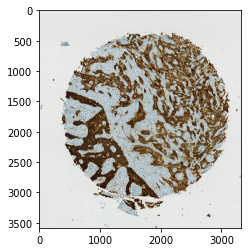

In [ ]:
show(dark)

In [ ]:
x,y = [2000,2000]

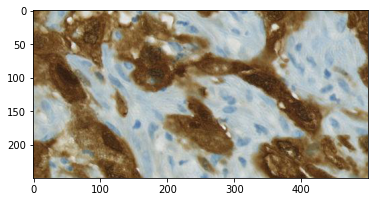

In [ ]:
full_patch = dark.crop((x,y,x+500,y+250))
show(full_patch)

In [ ]:
patch0 = full_patch.crop((0,0,250,250))
patch1 = full_patch.crop((125,0,375,250))
patch2 = full_patch.crop((250,0,500,250))

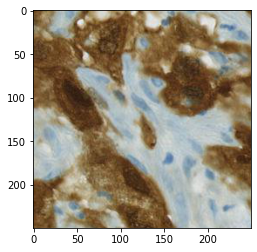

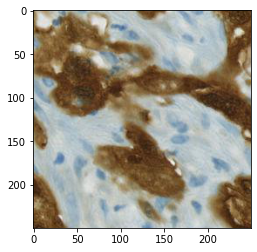

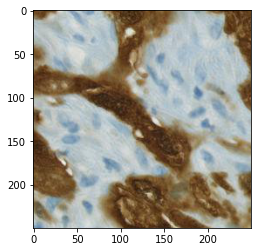

In [ ]:
show(patch0)
patch0.save(dir + 'dark_TMA_0X.jpg')
show(patch1)
patch1.save(dir + 'dark_TMA_1X.jpg')
show(patch2)
patch2.save(dir + 'dark_TMA_2X.jpg')

In [10]:
dir0 = '/content/drive/My Drive/Colab/Forked/ConSinGAN/TrainedModels/\
dark_TMA_0X/2020_09_13_20_55_04_generation_train_depth_3_lr_scale_0.1_act_lrelu_0.05/gen_samples_stage_9/{}'

dir1 = '/content/drive/My Drive/Colab/Forked/ConSinGAN/TrainedModels/\
dark_TMA_1X/2020_09_13_21_27_48_generation_train_depth_3_lr_scale_0.1_act_lrelu_0.05/gen_samples_stage_9/{}'

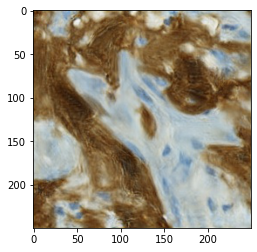

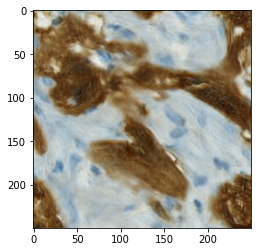

In [21]:
fake_0 = Image.open(dir0.format('gen_sample_3.jpg'),'r')
fake_1 = Image.open(dir1.format('gen_sample_3.jpg'),'r')

show(fake_0)
show(fake_1)

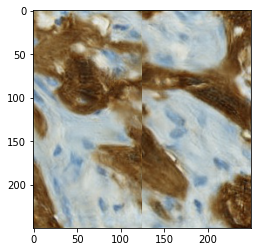

In [23]:
RHS_0 = fake_0.crop((125,0,250,250))
RHS_1 = fake_1.crop((125,0,250,250))
#show(RHS_0)
#show(RHS_1)
concat = get_concat_h(RHS_0, RHS_1)
show(concat)